# Importing Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline



In [55]:
df = pd.read_csv('Skyserver.csv')

# Exploring data

In [56]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [58]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [59]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

# Filtering the data

## Remove useless features

We need to remove columns that are unlikely to affect the prediction of our target

In [60]:
df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

## Categorical data

In [62]:
df['class']=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

In [69]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0,0.000590,3306,54922,512


# Exploratory data analysis

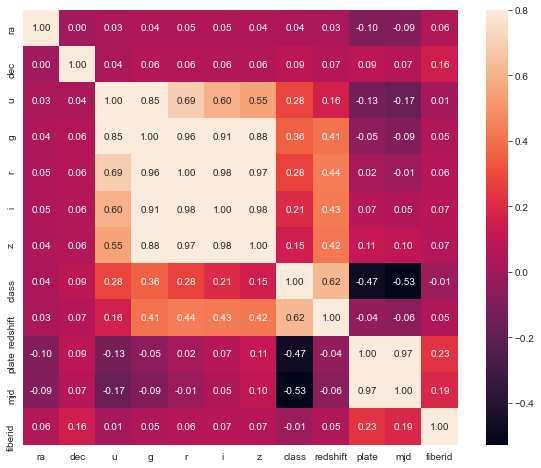

In [67]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [51]:
#def feature_dist(df0,df1,df2,label0,label1,label2,features):
#    plt.figure()
#    fig,ax=plt.subplots(13,1,figsize=(8,45))
#    i=0
#    for ft in features:
#        i+=1
#        plt.subplot(13,1,i)
#        # plt.figure()
#        sns.distplot(df0[ft], hist=False,label=label0)
#        sns.distplot(df1[ft], hist=False,label=label1)
#        sns.distplot(df2[ft], hist=False,label=label2)
#        plt.xlabel(ft, fontsize=11)
#        #locs, labels = plt.xticks()
#        plt.tick_params(axis='x', labelsize=9)
#        plt.tick_params(axis='y', labelsize=9)
#    plt.show()
#t0 = df.loc[df['class'] == 0]
#t1 = df.loc[df['class'] == 1]
#t2 = df.loc[df['class'] == 2]
#features = df.columns.values[:13]
#feature_dist(t0,t1,t2, 'STAR', 'GALAXY','QSO', features);

# Principal Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

We will now reduce the amount of dimensions by replacing the different bands 'u', 'g', 'r', 'i' and 'z' by a linear combination with only 3 dimensions using Principal Component Analysis.

## PCA as Features extraction

Principle Component Analysis (PCA) is a common feature extraction method in data science. Technically, PCA finds the eigenvectors of a covariance matrix with the highest eigenvalues and then uses those to project the data into a new subspace of equal or less dimensions.

In [70]:
df_fe = df

pca = PCA(n_components=3)
ugriz = pca.fit_transform(df_fe[['u', 'g', 'r', 'i', 'z']])

## update dataframe 

In [71]:
df_fe = pd.concat((df_fe, pd.DataFrame(ugriz)), axis=1)
df_fe.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
df_fe.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
df_fe.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,0,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,0,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,1,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,0,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,0,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


# Features scaling

In [73]:
scaler = MinMaxScaler()
df_sc = scaler.fit_transform(df_fe.drop('class', axis=1))

# Splitting data into train and test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_sc, df_fe['class'], test_size=0.33)

# Machine Learning Models

## K Nearest Neighbors

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 92.55


## XGBoost

In [80]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 99.36


## Random Forest Classifier

In [81]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.15


## Support Vector Machine Classifier

In [84]:
svc = SVC()
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 94.09


## LogisticRegression

In [97]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)
acc_log = (preds == y_test).sum().astype(float) / len(preds)*100
print("Scikit-Learn's Logistic regression's prediction accuracy is: %3.2f" % (acc_svc));

Scikit-Learn's Logistic regression's prediction accuracy is: 94.09


## Model evaluation

In [90]:

models = pd.DataFrame({
    'Model': ['knn', 'logreg', 
              'rfc',
              'xgb', 'svc' 
              ],
    'Score': [acc_knn, acc_log, 
              acc_xgb, acc_svc, acc_rfc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,rfc,99.363636
4,svc,99.151515
3,xgb,94.090909
0,knn,92.545455
1,logreg,91.454545


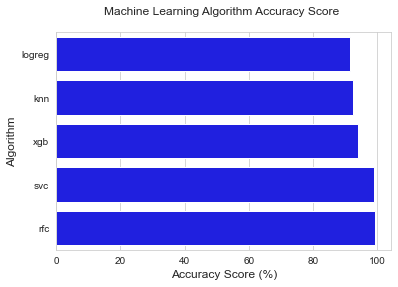

In [92]:
sns.barplot(x='Score', y = 'Model', data = models, color='b')
models.sort_values('Score',inplace=True)
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm');

# k-Fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

**It is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data**

## CV for Random Forest Classification

In [98]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99104478 0.99552239 0.99104478 0.9880597  0.98955224 0.98955224
 0.99253731 0.99104478 0.99850746 0.99402985]
Mean: 0.992089552238806
Standard Deviation: 0.0029888036409702876


## CV for XGBoost

In [101]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99253731 0.99402985 0.99104478 0.99104478 0.99104478 0.9880597
 0.99552239 0.99104478 1.         0.99402985]
Mean: 0.9928358208955224
Standard Deviation: 0.003116509405644943
